# Import Packages

In [338]:
#import packages.
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
np.set_printoptions(suppress=True)
from matplotlib.pyplot import figure

In [343]:
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [344]:
%pwd

'C:\\Users\\JM025575\\Predictive Models Class\\data'

In [345]:
cd /Users/JM025575/Predictive Models Class/data

C:\Users\JM025575\Predictive Models Class\data


# Import Data

In [381]:
#Import Using Pandas
auto = pd.read_csv("AUTO.csv", encoding = 'unicode_escape', thousands=',') #,thousands=','
auto.head()

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,Front,31,Regular,13.2,172,101,67,39,2635,47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,Acura TL,Front,22,Premium,17.1,193,108,70,40,3460,50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,Buick Century,Front,22,Regular,17.5,195,109,73,40,3350,50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
3,Buick LeSabre,Front,20,Regular,17.5,200,112,74,42,3640,51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5
4,Buick Park Avenue,Front,21,Regular,18.5,207,114,75,43,3880,51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0


In [382]:
auto = auto.fillna(auto.median())

In [383]:
auto.head()

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,Front,31,Regular,13.2,172,101,67,39,2635,47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,Acura TL,Front,22,Premium,17.1,193,108,70,40,3460,50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,Buick Century,Front,22,Regular,17.5,195,109,73,40,3350,50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
3,Buick LeSabre,Front,20,Regular,17.5,200,112,74,42,3640,51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5
4,Buick Park Avenue,Front,21,Regular,18.5,207,114,75,43,3880,51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0


# Exploratory Data Analysis

In [384]:
#show columns
auto.columns

Index(['Name', 'Drive Type', 'Mileage (mpg)', 'Fuel Type', 'Capacity (gal)',
       'Length (inches)', 'Wheel Base (inches)', 'Width (inches)',
       'Turning Circle (feet)', 'Weight (lbs)', 'Door Top (inches)',
       'Luggage (cu. ft.)', 'Front Shoulder (inches)',
       'Front Leg Room (inches)', 'Front Head Room (inches)',
       'Rear Shoulder (inches)', 'Rear Leg Room (inches)',
       'Rear Head Room (inches)'],
      dtype='object')

In [385]:
auto.shape

(106, 18)

In [386]:
#show data types of all features
auto.dtypes

Name                         object
Drive Type                   object
Mileage (mpg)                 int64
Fuel Type                    object
Capacity (gal)              float64
Length (inches)               int64
Wheel Base (inches)           int64
Width (inches)                int64
Turning Circle (feet)         int64
Weight (lbs)                  int64
Door Top (inches)           float64
Luggage (cu. ft.)           float64
Front Shoulder (inches)     float64
Front Leg Room (inches)     float64
Front Head Room (inches)    float64
Rear Shoulder (inches)      float64
Rear Leg Room (inches)      float64
Rear Head Room (inches)     float64
dtype: object

In [387]:
#mean of all numerical attributes
auto.mean()

Mileage (mpg)                 21.292453
Capacity (gal)                17.883019
Length (inches)              187.594340
Wheel Base (inches)          107.632075
Width (inches)                70.915094
Turning Circle (feet)         39.849057
Weight (lbs)                3502.311321
Door Top (inches)             53.891509
Luggage (cu. ft.)             25.056604
Front Shoulder (inches)       56.471698
Front Leg Room (inches)       41.254717
Front Head Room (inches)       4.287736
Rear Shoulder (inches)        54.745283
Rear Leg Room (inches)        28.363208
Rear Head Room (inches)        3.023585
dtype: float64

In [388]:
#standard deviation of all numerical attributes
auto.std()

Mileage (mpg)                 3.769469
Capacity (gal)                3.425714
Length (inches)              12.493639
Wheel Base (inches)           7.014713
Width (inches)                3.237041
Turning Circle (feet)         2.797252
Weight (lbs)                633.453939
Door Top (inches)             5.747465
Luggage (cu. ft.)            18.235538
Front Shoulder (inches)       3.041640
Front Leg Room (inches)       1.021775
Front Head Room (inches)      1.279784
Rear Shoulder (inches)        7.110437
Rear Leg Room (inches)        2.196895
Rear Head Room (inches)       1.370405
dtype: float64

In [389]:
#Drive Type Distribution
auto.groupby('Drive Type').size()

Drive Type
Front    81
Rear     25
dtype: int64

In [390]:
#Fuel Type Distribution
auto.groupby('Fuel Type').size()

Fuel Type
Premium    19
Regular    87
dtype: int64

In [392]:
#strip spaces from the end.  Done for future use in script.
auto["Fuel Type"] = auto["Fuel Type"].str.strip()

# Z-Score Normalization

In [393]:
#Transform to Weight to Z-Scores
Weight_Z=pd.DataFrame((auto['Weight (lbs)']-auto['Weight (lbs)'].mean())/auto['Weight (lbs)'].std())
print(Weight_Z.head(10))

   Weight (lbs)
0     -1.369178
1     -0.066795
2     -0.240446
3      0.217362
4      0.596237
5     -0.279912
6     -1.116595
7     -0.011542
8     -0.240446
9     -0.674574


In [394]:
Weights = pd.DataFrame(auto['Weight (lbs)'])

In [396]:
#Concatenating my two data frames to see my normalized weight next to the original Weight feature.
Weight_Scores = pd.concat([Weight_Z, Weights], axis = 1)
print(Weight_Scores.head(10))

   Weight (lbs)  Weight (lbs)
0     -1.369178          2635
1     -0.066795          3460
2     -0.240446          3350
3      0.217362          3640
4      0.596237          3880
5     -0.279912          3325
6     -1.116595          2795
7     -0.011542          3495
8     -0.240446          3350
9     -0.674574          3075


# Categorical Variables to Dummies

In [397]:
# perform data transformation. Creates dummies of any categorical feature and turns them in to their own column with values of 
# 0 or 1.
for col in auto.columns[:]:
	attName = col
	dType = auto[col].dtype
	missing = pd.isnull(auto[col]).any()
	uniqueCount = len(auto[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		auto = pd.concat([auto, pd.get_dummies(auto[col], prefix=col)], axis=1)
		del auto[attName]

In [398]:
auto.shape

(106, 125)

In [399]:
auto.columns = auto.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [400]:
auto.head()

,mileage_mpg,capacity_gal,length_inches,wheel_base_inches,width_inches,turning_circle_feet,weight_lbs,door_top_inches,luggage_cu._ft.,front_shoulder_inches,...,name_volkswagen_jetta,name_volkswagen_new_beetle,name_volkswagen_passat,name_volvo_s40/v40,name_volvo_s70/v70,name_volvo_s80,drive_type_front,drive_type_rear,fuel_type_premium,fuel_type_regular
0,31,13.2,172,101,67,39,2635,47.5,13.0,51.5,...,0,0,0,0,0,0,1,0,0,1
1,22,17.1,193,108,70,40,3460,50.0,14.0,56.0,...,0,0,0,0,0,0,1,0,1,0
2,22,17.5,195,109,73,40,3350,50.5,17.0,58.0,...,0,0,0,0,0,0,1,0,0,1
3,20,17.5,200,112,74,42,3640,51.0,18.0,59.5,...,0,0,0,0,0,0,1,0,0,1
4,21,18.5,207,114,75,43,3880,51.0,19.0,59.5,...,0,0,0,0,0,0,1,0,0,1


# Correlation Analysis

In [401]:
#correlation analysis of the auto dataframe
auto.corr()

,mileage_mpg,capacity_gal,length_inches,wheel_base_inches,width_inches,turning_circle_feet,weight_lbs,door_top_inches,luggage_cu._ft.,front_shoulder_inches,...,name_volkswagen_jetta,name_volkswagen_new_beetle,name_volkswagen_passat,name_volvo_s40/v40,name_volvo_s70/v70,name_volvo_s80,drive_type_front,drive_type_rear,fuel_type_premium,fuel_type_regular
mileage_mpg,1.000000,-0.787515,-0.387151,-0.512751,-0.578650,-0.571132,-0.875434,-0.771332,-0.619985,-0.607314,...,-0.007607,0.200493,0.070430,0.018405,-0.007607,-0.007607,0.434247,-0.434247,-0.069210,0.069210
capacity_gal,-0.787515,1.000000,0.505427,0.660131,0.678437,0.526678,0.888074,0.752458,0.716461,0.722434,...,-0.096832,-0.096832,-0.042448,-0.059622,0.017660,0.092079,-0.355375,0.355375,0.134342,-0.134342
length_inches,-0.387151,0.505427,1.000000,0.869492,0.832541,0.684696,0.550863,0.117489,0.240717,0.787516,...,-0.122389,-0.208720,-0.028209,-0.090996,-0.012513,0.018880,-0.077100,0.077100,0.062718,-0.062718
wheel_base_inches,-0.512751,0.660131,0.869492,1.000000,0.791321,0.641709,0.678488,0.411330,0.448967,0.790025,...,-0.120662,-0.120662,-0.022814,-0.106683,-0.036792,0.033100,-0.274368,0.274368,0.066904,-0.066904
width_inches,-0.578650,0.678437,0.832541,0.791321,1.000000,0.642269,0.743765,0.403390,0.450949,0.909002,...,-0.088301,-0.088301,-0.058010,-0.088301,-0.058010,0.032863,-0.166388,0.166388,0.035219,-0.035219
turning_circle_feet,-0.571132,0.526678,0.684696,0.641709,0.642269,1.000000,0.625479,0.413344,0.384132,0.624658,...,-0.134923,-0.134923,-0.064816,-0.064816,-0.064816,0.005291,-0.165816,0.165816,-0.133687,0.133687
weight_lbs,-0.875434,0.888074,0.550863,0.678488,0.743765,0.625479,1.000000,0.777217,0.656608,0.762697,...,-0.087041,-0.111808,-0.050665,-0.083945,-0.030542,0.019765,-0.437678,0.437678,0.187499,-0.187499
door_top_inches,-0.771332,0.752458,0.117489,0.411330,0.403390,0.413344,0.777217,1.000000,0.803932,0.498575,...,-0.049330,-0.023740,-0.049330,-0.066390,-0.066390,-0.040800,-0.379593,0.379593,-0.066383,0.066383
luggage_cu._ft.,-0.619985,0.716461,0.240717,0.448967,0.450949,0.384132,0.656608,0.803932,1.000000,0.603918,...,-0.064829,-0.070206,-0.054075,-0.064829,-0.054075,-0.059452,-0.146421,0.146421,-0.143753,0.143753
front_shoulder_inches,-0.607314,0.722434,0.787516,0.790025,0.909002,0.624658,0.762697,0.498575,0.603918,1.000000,...,-0.079680,-0.144155,-0.031325,-0.063562,-0.015206,0.065387,-0.148338,0.148338,0.044993,-0.044993


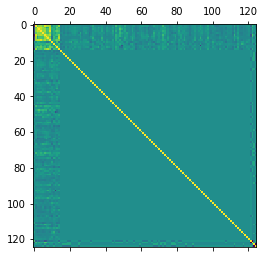

In [402]:
#visualize the correlation matrix
plt.matshow(auto.corr())
plt.show()

# PCA

In [403]:
# Create PCA Model
pca = PCA(n_components = 3)

In [404]:
# Fit PCA Model
print(pca.fit(auto))

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [405]:
#Variation explained by each additional principal component
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
#Look at cumulative? .explained_variance_ratio_ and add .cumsum(), set_printoptions(suppress=True)

[401538.52755012    207.48426551    126.29005424]
[0.99897665 0.00051619 0.00031419]
[0.99897665 0.99949285 0.99980704]


# Scatter Plot

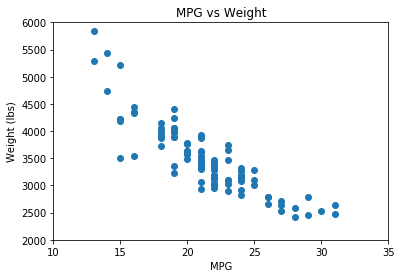

In [406]:
# Scatter plot of MPG vs Weight
plt.scatter(auto.mileage_mpg, auto.weight_lbs)
plt.title('MPG vs Weight')
plt.xlabel("MPG")
plt.ylabel("Weight (lbs)")
plt.xlim(10, 35)
plt.ylim(2000, 6000)
plt.show()

# Histogram

<function matplotlib.pyplot.show>

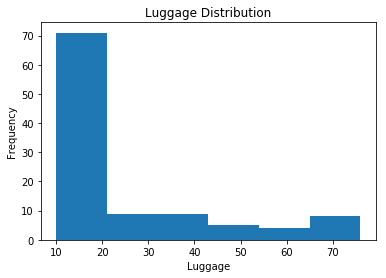

In [407]:
#Histogram showing the luggage cubic feet distribution
plt.hist(auto['luggage_cu._ft.'], bins = 6)
plt.title('Luggage Distribution')
plt.xlabel("Luggage")
plt.ylabel("Frequency")
plt.show

<function matplotlib.pyplot.show>

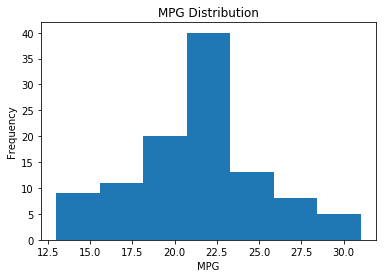

In [409]:
# Histogram showing the distribution of MPG
plt.hist(auto.mileage_mpg, bins = 7)
plt.title('MPG Distribution')
plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.show

# Crosstab

In [410]:
auto.shape

(106, 125)

In [411]:
#Crosstab of the drive types versus the fuel types
auto_cross = pd.crosstab([auto.drive_type_front, auto.drive_type_rear],[auto.fuel_type_regular, auto.fuel_type_premium], margins=False, rownames = ['Front', 'Rear'], colnames = ['Regular', 'Premium'])
print(auto_cross)

Regular      0   1
Premium      1   0
Front Rear        
0     1      8  17
1     0     11  70


## Crosstab Visualized 

Text(0.5,1,'Fuel Type by Drive Type')

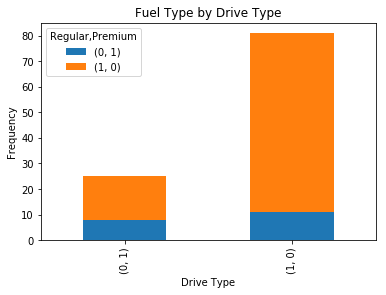

In [412]:
#Bar plot of Fuel Type by Drive Type
auto_cross.plot(kind='bar', stacked=True)
plt.xlabel("Drive Type")
plt.ylabel("Frequency")
plt.title('Fuel Type by Drive Type')

# New Dataframe

Creating a new data frame that contains regular fuel type and where MPG is greater than 21

In [329]:
df1 = pd.DataFrame(auto.fuel_type_regular)

In [330]:
df2 = pd.DataFrame(auto.mileage_mpg > 21)

In [332]:
auto_sub = pd.concat([df1, df2], axis = 1)

In [333]:
auto_sub.head()

,fuel_type_regular,mileage_mpg
0,1,True
1,0,True
2,1,True
3,1,False
4,1,False
